In [156]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing(use_latex="mathjax")

Rb, Rd and I all blowing up/down at zmax or at 500 for all initial conditions

In [346]:
# all vars are automatically global in python
v=0.25
lbg=0.1
k=0.0003
kbg=0.4
I0=300
mumax=1.2
romax=0.2
m=15
qmax=0.04
qmin=0.004
h=120
d=10

N=500
zmax = 500
z = np.linspace(0,zmax,N) # (start,stop, number of nodes)

A1_guess = 1000
Rb1_guess = 1000
Rd1_guess = 100

A1,Rb1,Rd1 = sym.symbols('A1 Rb1 Rd1')

In [347]:
# functions
def q(Rb, A): # don't need this
    return Rb/A
    
def p(I,q, mumax=mumax, qmin=qmin, h=h):
    return mumax * (1 - qmin/q) * (I/(h + I))
    
def ro(q, Rd, romax = romax, qmax = qmax, qmin=qmin, m=m):
    return romax * (qmax-q)/(qmax-qmin) * ( Rd/(m + Rd) )

In [348]:
def plankton_equations(y):
    A1 = y[0]
    A2 = y[1]
    Rb1 = y[2]
    Rb2 = y[3]
    Rd1 = y[4]
    Rd2 = y[5]
    I = y[6]
    q = Rb1/A1
    
    derivatives = np.array((A2,
                     (v*A2 - p(I,q)*A1 + lbg*A1)/d,
                     Rb2,
                     (v*Rb2 - ro(q,Rd1)*A1 - lbg*Rb1)/d,
                     Rd2,
                     (ro(q,Rd1)*A1 - lbg*Rb1)/d,
                     (k*A1 + kbg)*I))
    return derivatives

initial_conditions = np.array([A1_guess,
                              v*A1_guess/d,
                              Rb1_guess,
                              v*Rb1_guess/d,
                              Rd1_guess,
                              0,
                              I0])

In [357]:
def one_step_rk4(f, xvinit, Tmax, N):
    xv = xvinit                         # set first ROW = initial conditions
    h = Tmax / N                           # step size
    k1 = f(xv)
    k2 = f(xv + h/2.0*k1)
    k3 = f(xv + h/2.0*k2)
    k4 = f(xv + h*k3)
    next_step = xv[0] + h/6.0 *( k1 + 2*k2 + 2*k3 + k4)
    return next_step

In [349]:
def rk4(f, xvinit, Tmax, N):               # N=number of steps
    T = np.linspace(0, Tmax, N+1)
    xv = np.zeros( (len(T), len(xvinit)) ) # matrix with # cols=# initial conditions
    xv[0] = xvinit                         # set first ROW = initial conditions
    h = Tmax / N                           # step size
    for i in range(N):
        k1 = f(xv[i])
        k2 = f(xv[i] + h/2.0*k1)
        k3 = f(xv[i] + h/2.0*k2)
        k4 = f(xv[i] + h*k3)
        xv[i+1] = xv[i] + h/6.0 *( k1 + 2*k2 + 2*k3 + k4)
    return T, xv

In [361]:
first_step = one_step_rk4(lambda x: plankton_equations(x), initial_conditions, zmax, N)
second_step = one_step_rk4(lambda x: plankton_equations(x), first_step, zmax, N)
second_step

array([1847.00838074,  859.53484137, 4143.04704902, 2716.87813502,
       -168.38162729, -731.30030504, 2658.36394054])

In [365]:
initial_conditions

array([1000.,   25., 1000.,   25.,  100.,    0.,  300.])

In [366]:
first_step

array([ 984.62487786,  916.72452355, 1716.49161869, 2445.09639871,
        300.27584173, -448.96767198, 1303.51656126])

In [367]:
second_step

array([1847.00838074,  859.53484137, 4143.04704902, 2716.87813502,
       -168.38162729, -731.30030504, 2658.36394054])

In [350]:
z, derivs = rk4(lambda x: plankton_equations(x), initial_conditions, zmax, N)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5, 1.0, 'A - Plankton')

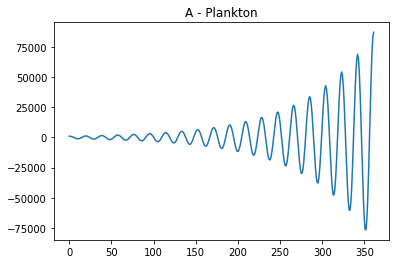

In [351]:
plt.plot(z,derivs[:,0])
plt.title('A - Plankton')

Text(0.5, 1.0, 'Rb - Bound Nutrients')

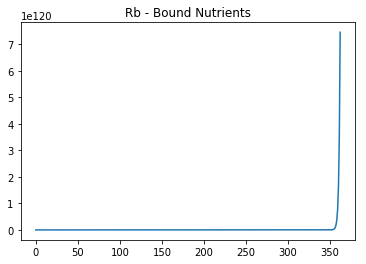

In [352]:
plt.plot(z,derivs[:,2])
plt.title('Rb - Bound Nutrients')

Text(0.5, 1.0, 'dRb/dz - Rate of Change of Bound Nutrients')

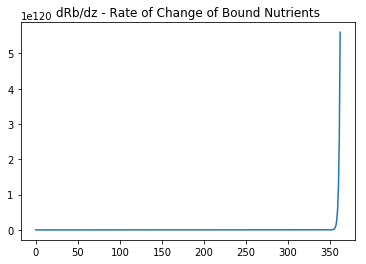

In [353]:
plt.plot(z,derivs[:,3])
plt.title('dRb/dz - Rate of Change of Bound Nutrients')

Text(0.5, 1.0, 'Rd - Dissolved Nutrients')

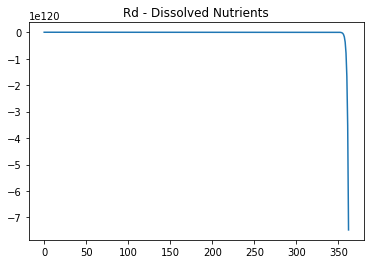

In [354]:
plt.plot(z,derivs[:,4])
plt.title('Rd - Dissolved Nutrients')

Text(0.5, 1.0, 'dRd/dz - Rate of Change of Dissolved Nutrients')

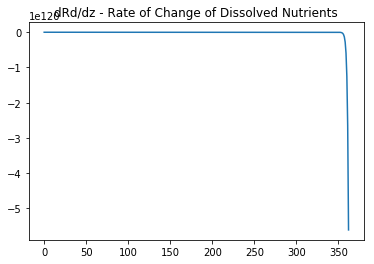

In [355]:
plt.plot(z,derivs[:,5])
plt.title('dRd/dz - Rate of Change of Dissolved Nutrients')

Text(0.5, 1.0, 'I - Light Intensity')

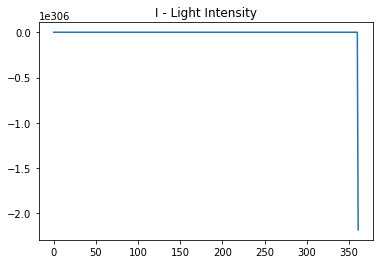

In [356]:
plt.plot(z,derivs[:,6])
plt.title('I - Light Intensity')